<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/Kaggle%2C%20%EB%8D%B0%EC%9D%B4%EC%BD%98/bike_timeseries_0720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tseries.offsets import Day, Hour, Minute, Second

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

print('train shape:',train.shape)
print('test shape:',test.shape)
train.head()

train shape: (10886, 12)
test shape: (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
sub=pd.read_csv('/content/sampleSubmission.csv')
print('submission shape:', sub.shape)
sub.head()

submission shape: (6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [3]:
# Prophet Library
from prophet import Prophet

# Prophet 시각화 도구
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot

In [4]:
y_train_prophet_df = train[['datetime','count']]
y_train_prophet_df.columns = ['ds', 'y']
y_train_prophet_df.head()

,ds,y
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [5]:
x_col = [i for i in train.columns if i not in ['datetime','count']]
x_train_prophet_df = train[x_col]
x_train_prophet_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0,3,13
1,1,0,0,1,9.02,13.635,80,0.0,8,32
2,1,0,0,1,9.02,13.635,80,0.0,5,27
3,1,0,0,1,9.84,14.395,75,0.0,3,10
4,1,0,0,1,9.84,14.395,75,0.0,0,1


In [6]:
yx_train_prophet_df = pd.concat([y_train_prophet_df, x_train_prophet_df], axis=1)
yx_train_prophet_df.head()

,ds,y,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 00:00:00,16,1,0,0,1,9.84,14.395,81,0.0,3,13
1,2011-01-01 01:00:00,40,1,0,0,1,9.02,13.635,80,0.0,8,32
2,2011-01-01 02:00:00,32,1,0,0,1,9.02,13.635,80,0.0,5,27
3,2011-01-01 03:00:00,13,1,0,0,1,9.84,14.395,75,0.0,3,10
4,2011-01-01 04:00:00,1,1,0,0,1,9.84,14.395,75,0.0,0,1


In [7]:
# Applying Prophet Model

fit_default_prophet = Prophet(
    # 1) linear, logistic
    growth='linear',

    # 2) Trend
    changepoints=None, # CP가 발생하는 시점들의 list ['2012-01-01']
    n_changepoints=500, # CP의 수
    changepoint_range=0.8, # CP의 기존 데이터 수 대비 최대 비율
    changepoint_prior_scale=0.05, # CP 추정 민감도로 높을수록 민감

    # 3) Seasonality
    seasonality_mode='multiplicative', # 계절성 모델: 'additive' or 'multiplicative'
    seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
    yearly_seasonality='auto', # 연계절성
    weekly_seasonality='auto',# 월계절성
    daily_seasonality='auto', #일계절성

    # 4) Holiday
    holidays=None, # 휴일 또는 이벤트 시점
    holidays_prior_scale=10.0, # 휴일 추정 민감도로 높을수록 민감

    # 5) Others
    interval_width=0.7, # 추세 예측 정확도 구간범위
    mcmc_samples=10, # 계절성 예측 정확도 제어
)

# fit_default_prophet.add_seasonality(name='monthly',period=30.5,fourier_order=5)

In [8]:
# model 학습
fit_reg1_prophet = fit_default_prophet.fit(yx_train_prophet_df)

# Frequency에 대한 사전 df를 만듦
forecast = fit_reg1_prophet.make_future_dataframe(freq='H',periods=sub.shape[0])

# predict
pred_reg1_prophet = fit_reg1_prophet.predict(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9th22oq8/87llj8od.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9th22oq8/n1684noy.json
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
14:16:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=27811', 'data', 'file=/tmp/tmp9th22oq8/87llj8od.json', 'init=/tmp/tmp9th22oq8/n1684noy.json', 'output', 'file=/tmp/tmp9th22oq8/prophet_modelod8ugcwt/prophet_model-20230722141609_1.csv', 'method=sample', 'num_samples=5', 'num_warmup=5', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=27811', 'data', 'file=/tmp/tmp9th22oq8/87llj8od.json', 'init=/tmp/tmp9th22oq8/n1684noy.json', 'output', 'file=/tmp/tmp9th22oq8/prophet_modelod8ugcwt/prophet_model-20230722141609_2.csv', 'method=sample', 'num_samples=5', 'num_warmup=5', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:ru

14:16:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=27811', 'data', 'file=/tmp/tmp9th22oq8/87llj8od.json', 'init=/tmp/tmp9th22oq8/n1684noy.json', 'output', 'file=/tmp/tmp9th22oq8/prophet_modelod8ugcwt/prophet_model-20230722141609_1.csv', 'method=sample', 'num_samples=5', 'num_warmup=5', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9th22oq8/prophet_modelod8ugcwt/prophet_model-20230722141609_1.csv
 console_msgs (if any):
	/tmp/tmp9th22oq8/prophet_modelod8ugcwt/prophet_model-20230722141609_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5
    num_warmup = 5
    save_warmup = 0 (Default)
    thin = 1 (Default)
    

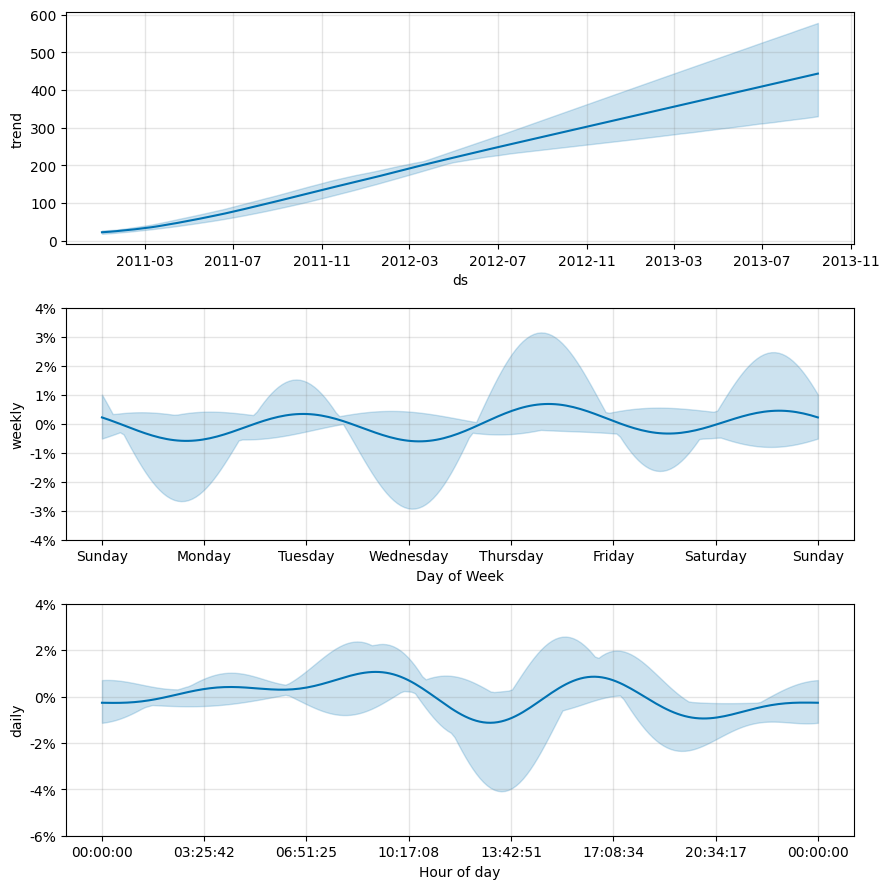

In [9]:
fig = fit_default_prophet.plot_components(pred_reg1_prophet)
plt.show()

In [10]:
pred_train_reg1_prophet = np.ravel(
    pred_reg1_prophet.loc[:yx_train_prophet_df.shape[0]-1, ['yhat']])

pred_test_reg1_prophet = np.ravel(
    pred_reg1_prophet.loc[yx_train_prophet_df.shape[0]:, ['yhat']])

In [11]:
sub['count'] = pred_test_reg1_prophet
sub['count'] = sub['count'].apply(lambda x:round(x,0))
sub.loc[sub['count']<0,'count'] = 0
sub.head()

,datetime,count
0,2011-01-20 00:00:00,325.0
1,2011-01-20 01:00:00,325.0
2,2011-01-20 02:00:00,326.0
3,2011-01-20 03:00:00,327.0
4,2011-01-20 04:00:00,328.0


In [12]:
sub.to_csv("kaggle_time.csv", index = False)